In [22]:
import numpy as np
import random
import matplotlib.pyplot as plt
import time
import math

In [23]:
# K : K Armed Bandit
K = 10
# stepSize : Number of Steps
stepSize = 1000
#alpha : constant value of step size
alpha = 0.1
#C for UCB
c = 2

In [24]:
def returnRewardTimeStepMean(estimatedValueFunctionOriginal, epsilon, nonStationary, upperConfidenceBound, meanAverage):
    
    currentTime = time.time()
    rewardTimeStep = np.zeros(stepSize)
    optimalActionStep = np.zeros(stepSize)
    for runs in range(2000):
        trueValueFunction = np.random.randn(K)
        estimatedValueFunction = np.copy(estimatedValueFunctionOriginal)
        alphaAction = np.zeros(K)
        for i in range(stepSize):
            epsilonProbability = random.uniform(0,1)
            
            if upperConfidenceBound == False:
                if epsilonProbability >= epsilon :
                    actionIndex = np.argmax(estimatedValueFunction)
                else :
                    actionIndex = random.randint(0,K-1)
                    
            else:
                upperConfidenceBoundAction = np.copy(estimatedValueFunction)
                numberZeros = np.count_nonzero(alphaAction)
                if numberZeros == 10:
                    alphaActionInverse = 1/alphaAction
                    upperConfidenceBoundAction += c*np.sqrt(math.log(i)*alphaActionInverse)
                    actionIndex = np.argmax(upperConfidenceBoundAction)
                else:
                    actionIndex = np.random.choice(np.where(alphaAction==0)[0])
                
                
            mean, sigma = trueValueFunction[actionIndex], 1
            actionReward = np.random.normal(mean, sigma, 1)
            
            bestTrueAction = np.argmax(trueValueFunction)
            if actionIndex == bestTrueAction:
                optimalActionStep[i] += 1
            
            rewardTimeStep[i] += actionReward
            
            alphaAction[actionIndex] += 1
            
            if meanAverage == True:
                constant = 1/alphaAction[actionIndex]
            else:
                constant = alpha
                
            estimatedValueFunction[actionIndex] += constant*(actionReward - estimatedValueFunction[actionIndex])
        
            if nonStationary == True:
                incrementalUpdate = np.random.normal(0,0.01,10)
                trueValueFunction += incrementalUpdate
    
    rewardTimeStepMean = rewardTimeStep/2000
    optimalActionStep /= 2000
    optimalActionStep *= 100

    print("Time taken : ", time.time() - currentTime)
    return rewardTimeStepMean, optimalActionStep

## <span style='color:Black'> Stationary Problem </span>

### <span style='color:Black'> Optimistic </span>

In [25]:
estimatedValueFunction = np.zeros(K) + 5
nonStationary = False
epsilon = 0
upperConfidenceBound = False
meanAverage = False
rewardTimeStepMean_1, optimalActionStep_1 = returnRewardTimeStepMean(estimatedValueFunction, epsilon, nonStationary, upperConfidenceBound, meanAverage)

Time taken :  39.5375280380249


### <span style='color:Black'> E Greedy </span>

In [26]:
estimatedValueFunction = np.zeros(K)
nonStationary = False
epsilon = 0.1
upperConfidenceBound = False
meanAverage = False
rewardTimeStepMean_2, optimalActionStep_2 = returnRewardTimeStepMean(estimatedValueFunction, epsilon, nonStationary, upperConfidenceBound, meanAverage)

Time taken :  39.87188768386841


### <span style='color:Black'> Upper Confidence Bound </span>

In [27]:
estimatedValueFunction = np.zeros(K)
nonStationary = False
epsilon = 0
upperConfidenceBound = True
meanAverage = False
rewardTimeStepMean_3, optimalActionStep_3 = returnRewardTimeStepMean(estimatedValueFunction, epsilon, nonStationary, upperConfidenceBound, meanAverage)

Time taken :  71.30325484275818


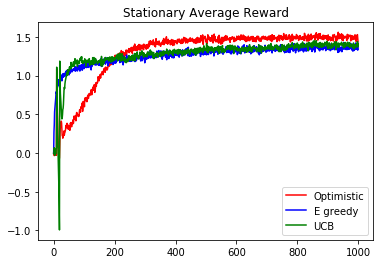

In [28]:
plt.figure()
plt.title('Stationary Average Reward')
plt.plot(rewardTimeStepMean_1, 'r', label='Optimistic')
plt.plot(rewardTimeStepMean_2, 'b', label='E greedy')
plt.plot(rewardTimeStepMean_3, 'g', label='UCB')
plt.legend(loc='lower right')
plt.show()

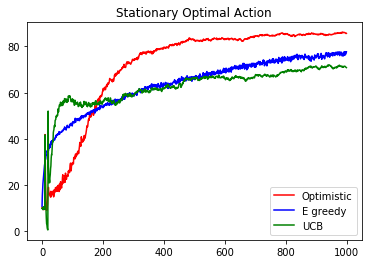

In [29]:
plt.figure()
plt.title('Stationary Optimal Action')
plt.plot(optimalActionStep_1, 'r', label='Optimistic')
plt.plot(optimalActionStep_2, 'b', label='E greedy')
plt.plot(optimalActionStep_3, 'g', label='UCB')
plt.legend(loc='lower right')
plt.show()

## <span style='color:Black'> Non Stationary Problem </span>

### <span style='color:Black'> Optimistic </span>

In [30]:
estimatedValueFunction = np.zeros(K) + 5
nonStationary = True
epsilon = 0
upperConfidenceBound = False
meanAverage = False
rewardTimeStepMean_1, optimalActionStep_1 = returnRewardTimeStepMean(estimatedValueFunction, epsilon, nonStationary, upperConfidenceBound, meanAverage)

Time taken :  56.56677293777466


### <span style='color:Black'> E Greedy </span>

In [31]:
estimatedValueFunction = np.zeros(K)
nonStationary = True
epsilon = 0.1
upperConfidenceBound = False
meanAverage = False
rewardTimeStepMean_2, optimalActionStep_2 = returnRewardTimeStepMean(estimatedValueFunction, epsilon, nonStationary, upperConfidenceBound, meanAverage)

Time taken :  52.932636976242065


### <span style='color:Black'> Upper Confidence Bound </span>

In [32]:
estimatedValueFunction = np.zeros(K)
nonStationary = True
epsilon = 0
upperConfidenceBound = True
meanAverage = False
rewardTimeStepMean_3, optimalActionStep_3 = returnRewardTimeStepMean(estimatedValueFunction, epsilon, nonStationary, upperConfidenceBound, meanAverage)

Time taken :  82.49505376815796


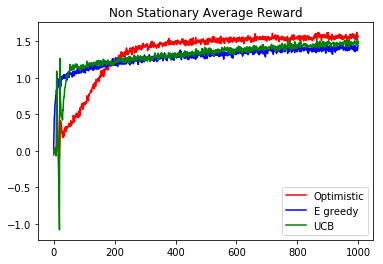

In [33]:
plt.figure()
plt.title('Non Stationary Average Reward')
plt.plot(rewardTimeStepMean_1, 'r', label='Optimistic')
plt.plot(rewardTimeStepMean_2, 'b', label='E greedy')
plt.plot(rewardTimeStepMean_3, 'g', label='UCB')
plt.legend(loc='lower right')
plt.show()

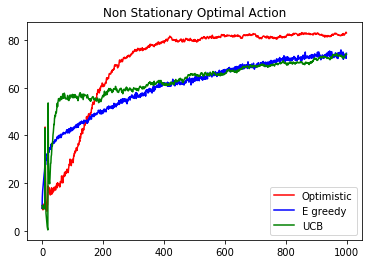

In [34]:
plt.figure()
plt.title('Non Stationary Optimal Action')
plt.plot(optimalActionStep_1, 'r', label='Optimistic')
plt.plot(optimalActionStep_2, 'b', label='E greedy')
plt.plot(optimalActionStep_3, 'g', label='UCB')
plt.legend(loc='lower right')
plt.show()